# Import libraries

In [1]:
import pandas as pd
import numpy as np
from pycaret.classification import *

# Data Import

In [2]:
import pandas as pd
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning

In [3]:
# Deleted columns PassengerId
train.drop(['PassengerId'], axis=1, inplace=True)

# Deleted columns Name
train.drop(['Name'], axis=1, inplace=True)

# Set formula of Sex
train['Sex'] =np.where(train['Sex'] == 'male', 1, 0)

# Filled NaN values in 1 columns in train
columns_to_fill_nan = ['Age']
train[columns_to_fill_nan] = train[columns_to_fill_nan].fillna(train[columns_to_fill_nan].mean(numeric_only=False))

# Changed Age to dtype int
train['Age'] = train['Age'].fillna(0).astype('int')

# Set formula of SibSp
train['SibSp'] = np.where(train['SibSp']==0,0,1)

# Set formula of Parch
train['Parch'] = np.where(train['Parch']==0,0,1)

# Deleted columns Ticket
train.drop(['Ticket'], axis=1, inplace=True)

# Deleted columns Cabin
train.drop(['Cabin'], axis=1, inplace=True)

# Deleted columns Fare
train.drop(['Fare'], axis=1, inplace=True)

# Filtered Embarked
train = train[train['Embarked'].notnull()]

df = train
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22,1,0,S
1,1,1,0,38,1,0,C
2,1,3,0,26,0,0,S
3,1,1,0,35,1,0,S
4,0,3,1,35,0,0,S


# Feature engineering

In [4]:
# Dummie Pclass
df_eng = pd.get_dummies(df['Pclass'])
df = df.join(df_eng).drop('Pclass', axis=1)

# Dummie Embarked
df_embark = pd.get_dummies(df['Embarked'])
df = df.join(df_embark).drop('Embarked', axis=1)

# Group and Dummie Age
df['Age'] = pd.cut(x=df['Age'],bins=[0,2,17,65,99],labels=['Toddler','Child','Adult','Elderly'])
df_age = pd.get_dummies(df['Age'])
df = df.join(df_age).drop('Age', axis=1)

df.head()

,Survived,Sex,SibSp,Parch,1,2,3,C,Q,S,Toddler,Child,Adult,Elderly
0,0,1,1,0,0,0,1,0,0,1,0,0,1,0
1,1,0,1,0,1,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,1,0,0,1,0
3,1,0,1,0,1,0,0,0,0,1,0,0,1,0
4,0,1,0,0,0,0,1,0,0,1,0,0,1,0


# Setup

In [5]:
cls_fe = setup(df, target='Survived', remove_multicollinearity=True, session_id=2022)

,Description,Value
0,session_id,2022
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(889, 14)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


# Model building

In [6]:
top_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8134,0.8216,0.6548,0.8452,0.7342,0.5945,0.6091,0.1230
rf,Random Forest Classifier,0.8102,0.8368,0.6590,0.8309,0.7317,0.5886,0.6007,0.1390
dt,Decision Tree Classifier,0.8070,0.8185,0.6388,0.8435,0.7223,0.5793,0.5961,0.0090
xgboost,Extreme Gradient Boosting,0.8070,0.8365,0.6590,0.8211,0.7282,0.5821,0.5929,0.0870
lightgbm,Light Gradient Boosting Machine,0.8022,0.8474,0.6508,0.8149,0.7196,0.5708,0.5824,0.0230
gbc,Gradient Boosting Classifier,0.7990,0.8425,0.6345,0.8214,0.7117,0.5622,0.5764,0.0490
knn,K Neighbors Classifier,0.7958,0.8171,0.6755,0.7802,0.7205,0.5620,0.5684,0.0190
lda,Linear Discriminant Analysis,0.7941,0.8414,0.7032,0.7599,0.7286,0.5634,0.5662,0.0100
ridge,Ridge Classifier,0.7925,0.0000,0.6992,0.7590,0.7260,0.5598,0.5626,0.0070
lr,Logistic Regression,0.7828,0.8385,0.6672,0.7557,0.7056,0.5356,0.5405,1.1600


# We shall use Random Forest Classifier

In [7]:
dt = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.8053,0.6800,0.9444,0.7907,0.6866,0.7079
1,0.8095,0.8532,0.6800,0.8095,0.7391,0.5909,0.5965
2,0.7903,0.8411,0.6400,0.8000,0.7111,0.5497,0.5582
3,0.7258,0.7492,0.5200,0.7222,0.6047,0.4032,0.4159
4,0.7742,0.7881,0.5600,0.8235,0.6667,0.5051,0.5266
5,0.8710,0.8984,0.7600,0.9048,0.8261,0.7248,0.7317
6,0.8548,0.8805,0.6667,0.9412,0.7805,0.6767,0.6992
7,0.8065,0.8876,0.7917,0.7308,0.7600,0.5983,0.5996
8,0.7903,0.8010,0.5833,0.8235,0.6829,0.5330,0.5507


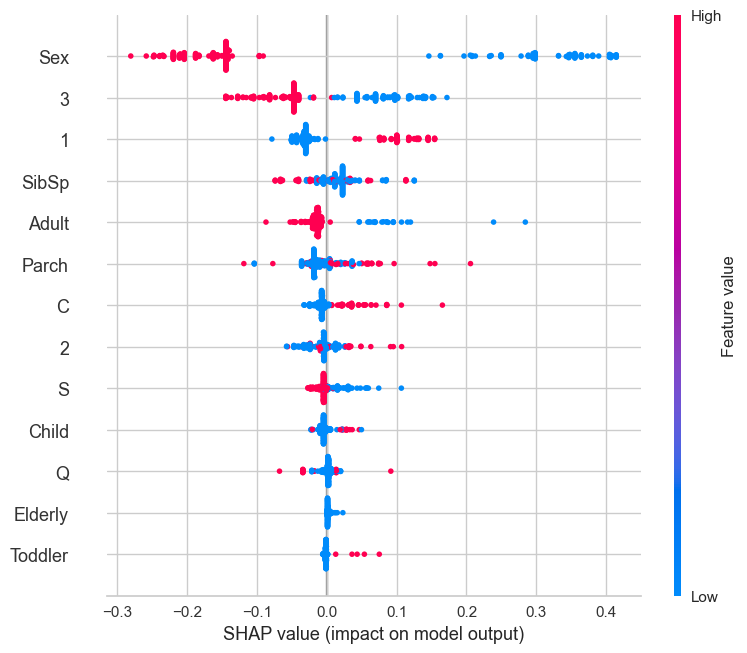

In [8]:
interpret_model(dt)

# Tune Model

In [9]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8413,0.9095,0.6400,0.9412,0.7619,0.6492,0.6764
1,0.8095,0.8516,0.6000,0.8824,0.7143,0.5791,0.6033
2,0.7581,0.7843,0.5200,0.8125,0.6341,0.4661,0.4921
3,0.7419,0.7405,0.3600,1.0000,0.5294,0.4017,0.5013
4,0.7903,0.7789,0.5200,0.9286,0.6667,0.5308,0.5784
5,0.8710,0.9297,0.7200,0.9474,0.8182,0.7210,0.7374
6,0.8226,0.8739,0.5833,0.9333,0.7179,0.5984,0.6335
7,0.8226,0.8986,0.6667,0.8421,0.7442,0.6112,0.6209
8,0.7742,0.8043,0.5417,0.8125,0.6500,0.4930,0.5151


# Plot Model

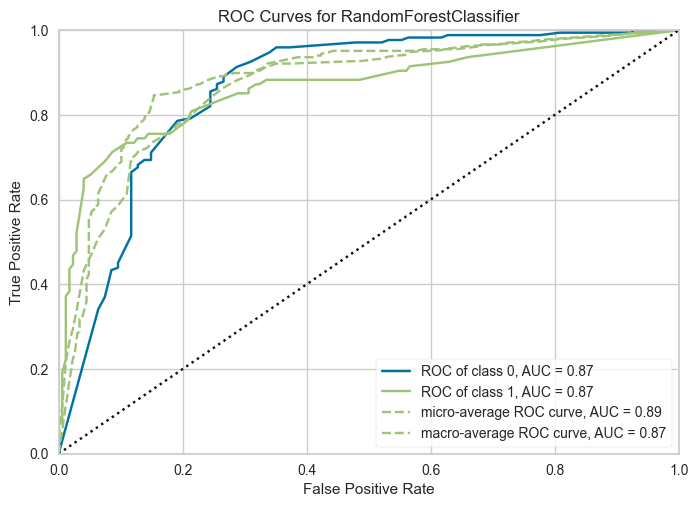

In [10]:
plot_model(tuned_dt)

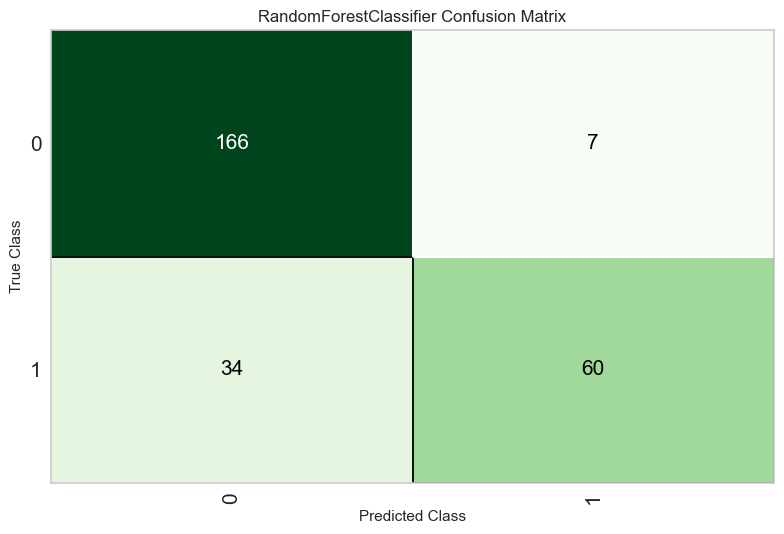

In [11]:
plot_model(tuned_dt, plot='confusion_matrix')

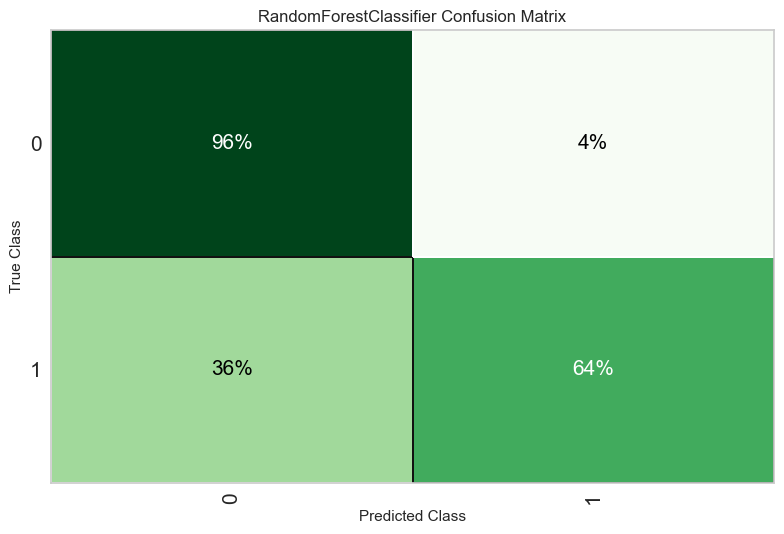

In [12]:
plot_model(tuned_dt, plot='confusion_matrix', plot_kwargs = {'percent' : True})

In [13]:
# plot_model(tuned_dt, plot = 'boundary')

In [14]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…